In [60]:
# import
# %matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
import requests
from torch.utils.tensorboard import SummaryWriter
from time import time, sleep
import math
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.backends.backend_pdf import PdfPages
 
import os

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.gmeans import gmeans
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

from matplotlib.patches import Rectangle

import talib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator
from datetime import timedelta
# from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc 


from matplotlib.collections import LineCollection

# import
# %matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
import requests
from torch.utils.tensorboard import SummaryWriter
import time
from datetime import datetime
import math
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression


# config
LR = 0.0001
EPOCH = 100
TRAIN_END=-300
DAYS_BEFORE=60
DAYS_BEFORES=[60,55,50,45,40,35,30,25,20,15,10,5] 
# DAYS_BEFORES=90
predDay= 180
cryptoCategory = '5'
cryptocurrencys_train1 = ['BTC' , 'WBTC']  # ....
cryptocurrencys_train2 = ['ETH' , 'PAXG', 'MKR'] # 1000 - 10000
cryptocurrencys_train3 = ['BNB' , 'GNO', 'XMR', 'BCH' ] # 100 - 1000
cryptocurrencys_train4 = ['AAVE','ZEC','EGLD','KSM','QNT','LTC','COMP','DASH','SOL','DCR','FTT','AVAX','ETC','BTG','AXS','KCS','AR','NEO'] # 10 - 100
cryptocurrencys_train5 = ['Atom' , 'CVX', 'DOT' , 'FIL' , 'ICP' ,'HNT' , 'APE' , 'HT' , 'LINK' , 'GT' , 'NEAR' , 'UNI' , 'WAVES'  , 'CAKE'  , 'RUNE'  , 'FLOW' , 'KDA','XTZ' , 'CELO' , 'SAND' , 'EOS'  , 'CRV', 'THETA']# 1 - 10
cryptocurrencys_train6 = ['BTC' , 'WBTC','ETH' , 'PAXG', 'MKR','BNB' , 'GNO', 'XMR', 'BCH' ,'AAVE','ZEC','EGLD','KSM','QNT','LTC','COMP','DASH','SOL','DCR','FTT','AVAX','ETC','BTG','AXS','KCS','AR','OKB','NEO','Atom' , 'CVX', 'DOT' , 'FIL' , 'ICP' ,'HNT' , 'APE' , 'HT' , 'LINK' , 'GT' , 'NEAR' , 'UNI' , 'WAVES' , 'LEO' , 'CAKE' , 'QTUM' , 'RUNE' ,'KAVA' , 'FLOW' , 'KDA','XTZ' , 'CELO' , 'SAND' , 'EOS'  , 'CRV', 'THETA'] #0.01  1
# cryptocurrencys_train = ['BTC','USDC','XRP','LUNA','SOL','ADA','UST','BUSD','DOGE','AVAX','DOT','SHIB','WBTC','DAI','TRX','MATIC','NEAR']
# cryptocurrencys_train.append('avg')
# cryptocurrencys_train
lastTime = ""

# cryptocurrencys = ['BTC','ETH','USDT','BNB','USDC','XRP','LUNA','SOL','ADA','UST','BUSD','DOGE','AVAX','DOT','SHIB','WBTC','DAI','TRX','MATIC','NEAR','BTRST', 'PAXG', 'MKR']
# cryptocurrencys1 = ['ETH' , 'PAXG', 'MKR']
cryptocurrencys1 = ['BTC' , 'WBTC']  # ....
cryptocurrencys2 = ['ETH' , 'PAXG', 'MKR'] # 1000 - 10000
cryptocurrencys3 = ['BNB' , 'GNO', 'XMR', 'BCH' ]# 100 - 1000
cryptocurrencys4 = ['AAVE','ZEC','EGLD','KSM','QNT','LTC','COMP','DASH','SOL','DCR','FTT','AVAX','ETC','BTG','AXS','KCS','AR','NEO'] # 10 - 1000
cryptocurrencys5 = ['Atom' , 'CVX', 'DOT' , 'FIL' , 'ICP' ,'HNT' , 'APE' , 'HT' , 'LINK' , 'GT' , 'NEAR' , 'UNI' , 'WAVES'  , 'CAKE'  , 'RUNE'  , 'FLOW' , 'KDA','XTZ' , 'CELO' , 'SAND' , 'EOS'  , 'CRV', 'THETA']# 1 - 10
cryptocurrencys6 =  ['BTC' , 'WBTC','ETH' , 'PAXG', 'MKR','BNB' , 'GNO', 'XMR', 'BCH' ,'AAVE','ZEC','EGLD','KSM','QNT','LTC','COMP','DASH','SOL','DCR','FTT','AVAX','ETC','BTG','AXS','KCS','AR','OKB','NEO','Atom' , 'CVX', 'DOT' , 'FIL' , 'ICP' ,'HNT' , 'APE' , 'HT' , 'LINK' , 'GT' , 'NEAR' , 'UNI' , 'WAVES' , 'LEO' , 'CAKE' , 'QTUM' , 'RUNE' ,'KAVA' , 'FLOW' , 'KDA','XTZ' , 'CELO' , 'SAND' , 'EOS' , 'CRV', 'THETA'] #0.01  1
target_currency = 'USD'

temp_symbol = []
# cryptocurrencys_train5 = ['QTUM']
# cryptocurrencys5 = ['QTUM']


if(cryptoCategory == '1' ):
  cryptocurrencys_train = cryptocurrencys_train1
  cryptocurrencys = cryptocurrencys1
elif(cryptoCategory == '2'):
  cryptocurrencys_train = cryptocurrencys_train2
  cryptocurrencys = cryptocurrencys2
elif(cryptoCategory == '3'):
  cryptocurrencys_train = cryptocurrencys_train3
  cryptocurrencys = cryptocurrencys3
elif(cryptoCategory == '4'):
  cryptocurrencys_train = cryptocurrencys_train4
  cryptocurrencys = cryptocurrencys4
elif(cryptoCategory == '5'):
  cryptocurrencys_train = cryptocurrencys_train5
  cryptocurrencys = cryptocurrencys5  
else:
  cryptocurrencys_train = cryptocurrencys_train6
  cryptocurrencys = cryptocurrencys6
# cryptocurrencys_train = ['Atom', 'DOT' , 'FIL' , 'ICP','CRV', 'THETA']# 1 - 10
# cryptocurrencys = ['Atom', 'DOT' , 'FIL' , 'ICP','CRV', 'THETA'] 
cryptocurrencys_train =['avg'+crypto for crypto in cryptocurrencys_train]



In [61]:
# get data
def get_hist_data(from_sym='BTC', to_sym='USD', timeframe='day', limit=2000, aggregation=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url_group_symbol = "https://min-api.cryptocompare.com/data/pricemulti"
    url += timeframe

    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}

    
    # parameters = {'fsyms': from_sym,
    #               'tsyms': to_sym,
    #               'limit': limit,
    #               'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange

    print('baseurl: ', url)
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)

    # response comes as json
    response = requests.get(url, params=parameters)
#     print("=====response===>" , response.json())
    data = response.json()['Data']['Data']

    return data



def getData(df, column, train_end=-300, days_before=30, return_all=True, generate_index=False, type_data= 'hour'):
    '''
    读取原始数据，并生成训练样本
    df             : 原始数据
    column         : 要处理的列
    train_end      : 训练集的终点
    days_before    : 多少天来预测下一天
    return_all     : 是否返回所有数据，默认 True
    generate_index : 是否生成 index
    '''
    series = df[column].copy()

    # 划分数据
    # 0 ~ train_end 的为训练数据，但实际上，最后的 n 天只是作为 label
    # 而 train 中的 label，可用于 test
    train_series, test_series = series[:train_end], series[train_end - days_before:]
    
    # 创建训练集
    train_data = pd.DataFrame()
        
    # 通过移位，创建历史 days_before 天的数据
    for i in range(days_before):
        # 当前数据的 7 天前的数据，应该取 开始到 7 天前的数据； 昨天的数据，应该为开始到昨天的数据，如：
        # [..., 1,2,3,4,5,6,7] 昨天的为 [..., 1,2,3,4,5,6]
        # 比如从 [2:-7+2]，其长度为 len - 7
        train_data['c%d' % i] = train_series.tolist()[i: -days_before + i]
            
    # 获取对应的 label
    train_data['y'] = train_series.tolist()[days_before:]
        
    # 是否生成 index
    if generate_index:
        train_data.index = train_series.index[n:]
                
    if return_all:
        return train_data, series, df.index.tolist()
    
    return train_data



In [139]:

data = [0] * len(cryptocurrencys)
for idx,symbol in enumerate(cryptocurrencys) :
  data[idx] = get_hist_data(symbol, target_currency, 'hour', 2000)

mergDateArray = [0] * len(data[0])
for idxData in range(len(data[0])): 
  selectedItem = {}
  selectedItem['avg']= 0
  for idxSymbol,symbol in enumerate(cryptocurrencys) :
    selectedDataArray =  data[idxSymbol]
    selectedItem['avg'] = selectedItem['avg'] + ((selectedDataArray[idxData]['low'] + selectedDataArray[idxData]['high'] )/2)
    selectedItem['time']  = selectedDataArray[idxData]['time'];
    selectedItem['date']  = datetime.fromtimestamp(selectedDataArray[idxData]['time']);
    lastTime = datetime.fromtimestamp(selectedDataArray[idxData]['time']);
    selectedItem['avg'+symbol] = data[idxSymbol][idxData]['low']
    # selectedItem['avg'+symbol] = (data[idxSymbol][idxData]['low'] + data[idxSymbol][idxData]['high']+data[idxSymbol][idxData]['open'] + data[idxSymbol][idxData]['close'] )/4
    selectedItem['open'+symbol] =  data[idxSymbol][idxData]['open']
    selectedItem['close'+symbol] =  data[idxSymbol][idxData]['close']
    selectedItem['low'+symbol] =  data[idxSymbol][idxData]['low']
    selectedItem['high'+symbol] =  data[idxSymbol][idxData]['high']
 
  mergDateArray[idxData] = selectedItem  

df_minute = pd.DataFrame.from_dict(mergDateArray)
df_minute = df_minute.set_index('date') 
df_minute.index = list(map(lambda x:x, df_minute.index))

baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'Atom', 'tsym': 'USD', 'limit': 2000, 'aggregate': 1}
baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'CVX', 'tsym': 'USD', 'limit': 2000, 'aggregate': 1}
baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'DOT', 'tsym': 'USD', 'limit': 2000, 'aggregate': 1}
baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'FIL', 'tsym': 'USD', 'limit': 2000, 'aggregate': 1}
baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'ICP', 'tsym': 'USD', 'limit': 2000, 'aggregate': 1}
baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'HNT', 'tsym': 'USD', 'limit': 2000, 'aggregate': 1}
baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  h

In [140]:
df_minute 


,avg,time,avgAtom,openAtom,closeAtom,lowAtom,highAtom,avgCVX,openCVX,closeCVX,...,avgCRV,openCRV,closeCRV,lowCRV,highCRV,avgTHETA,openTHETA,closeTHETA,lowTHETA,highTHETA
2022-11-17 13:30:00,68.61960,1668679200,9.998,10.040,10.000,9.998,10.060,3.921,3.923,3.926,...,0.5405,0.5406,0.5484,0.5405,0.5497,0.8775,0.8799,0.8788,0.8775,0.8799
2022-11-17 14:30:00,68.86315,1668682800,10.000,10.000,10.050,10.000,10.070,3.926,3.926,3.930,...,0.5484,0.5484,0.5529,0.5484,0.5532,0.8873,0.8788,0.8873,0.8873,0.8898
2022-11-17 15:30:00,68.84405,1668686400,9.999,10.050,10.050,9.999,10.050,3.897,3.930,3.909,...,0.5480,0.5529,0.5508,0.5480,0.5529,0.8813,0.8881,0.8813,0.8813,0.8881
2022-11-17 16:30:00,68.41330,1668690000,9.850,10.050,9.922,9.850,10.050,3.861,3.909,3.889,...,0.5370,0.5508,0.5428,0.5370,0.5554,0.8664,0.8793,0.8715,0.8664,0.8726
2022-11-17 17:30:00,68.17965,1668693600,9.858,9.922,9.940,9.858,9.994,3.863,3.889,3.883,...,0.5409,0.5428,0.5541,0.5409,0.5563,0.8712,0.8715,0.8712,0.8712,0.8749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08 17:30:00,94.13760,1675864800,15.190,15.310,15.250,15.190,15.370,6.554,6.644,6.557,...,1.1490,1.2100,1.1570,1.1490,1.2200,1.1530,1.1670,1.1560,1.1530,1.1640
2023-02-08 18:30:00,93.01570,1675868400,14.890,15.250,14.910,14.890,15.270,6.388,6.558,6.450,...,1.1170,1.1570,1.1190,1.1170,1.1570,1.1330,1.1560,1.1370,1.1330,1.1440
2023-02-08 19:30:00,91.53095,1675872000,14.590,14.910,15.040,14.590,15.040,6.258,6.453,6.441,...,1.0770,1.1190,1.1300,1.0770,1.1300,1.1180,1.1370,1.1340,1.1180,1.1390
2023-02-08 20:30:00,92.63120,1675875600,14.940,15.040,15.210,14.940,15.300,6.402,6.441,6.457,...,1.1270,1.1300,1.1580,1.1270,1.1830,1.1300,1.1300,1.1380,1.1300,1.1390


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from pandas_datareader import data

In [142]:
import yfinance as yf

df= yf.download("BTC-USD")


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: No data found for this date range, symbol may be delisted


In [143]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [166]:
newdf= pd.DataFrame(df_minute.closeCRV.copy())
newdf.rename(columns = {'closeCRV':'Close'}, inplace = True)
newdf

,Close
2022-11-17 13:30:00,0.5484
2022-11-17 14:30:00,0.5529
2022-11-17 15:30:00,0.5508
2022-11-17 16:30:00,0.5428
2022-11-17 17:30:00,0.5541
...,...
2023-02-08 17:30:00,1.1570
2023-02-08 18:30:00,1.1190
2023-02-08 19:30:00,1.1300
2023-02-08 20:30:00,1.1580


In [167]:
ema_l = 62
ema_s = 10
signal = 9
sma_l = 100
sma_s = 50

arg= (ema_s, ema_l,signal)

In [168]:
arg

(10, 62, 9)

In [170]:
def strategy_cross_ema(arg):
    data = newdf.copy()

    data["return"]  = np.log(data.Close.div(data.Close.shift(1)))
    data["ema_short"]  = data.Close.ewm(span=int(arg[0]) , min_periods=int(arg[0])).mean()
    data["ema_long"]  = data.Close.ewm(span=int(arg[1]) , min_periods=int(arg[1])).mean()
    data["signal"]  = data.Close.ewm(span=int(arg[2]) , min_periods=int(arg[2])).mean()
    data["macd"]  =  data["ema_short"] - data["ema_long"]
    # data["sma_short"]  = data.Close.rolling(int(arg[0])).mean()
    # data["sma_long"]  = data.Close.rolling(int(arg[1])).mean()

    data.dropna(inplace=True)

    data["position"] = np.where((data["macd"] -  data["signal"]) > 0 , 1 , -1)
    data["strategy"] = data.position.shift(1) * data["return"]
    data["cumreturn-strategy"] = data["strategy"].cumsum().apply(np.exp)
    data["cumreturn"] = data["return"].cumsum().apply(np.exp)

    return data[["return","strategy"]].sum().apply(np.exp),data
    return -data[["return","strategy"]].sum().apply(np.exp)[-1]

In [171]:
arg= (10., 65.,  9.)
profit,data =strategy_cross_ema(arg)
profit

return      2.117366
strategy    0.471937
dtype: float64

In [150]:
import scipy
from scipy.optimize import brute 

In [151]:
brute(strategy_cross_ema,((10,30,1),(50,100,1),(3,10,1)))

array([10., 65.,  3.])

#commision

<AxesSubplot:title={'center':'Atom'}>

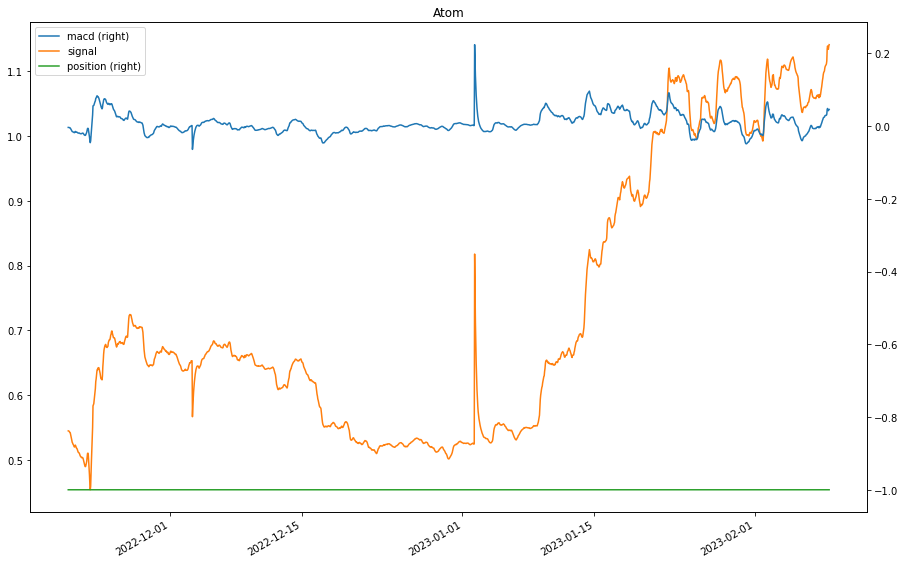

In [172]:
data.loc[:,["macd","signal","position"]].plot( title="Atom",figsize=(15,10),secondary_y=["position","macd"])

In [173]:
data

,Close,return,ema_short,ema_long,signal,macd,position,strategy,cumreturn-strategy,cumreturn
2022-11-20 05:30:00,0.5432,-0.000736,0.544948,0.548839,0.544808,-0.003891,-1,NaN,NaN,0.999264
2022-11-20 06:30:00,0.5433,0.000184,0.544648,0.548646,0.544507,-0.003998,-1,-0.000184,0.999816,0.999448
2022-11-20 07:30:00,0.5436,0.000552,0.544458,0.548471,0.544325,-0.004013,-1,-0.000552,0.999264,1.000000
2022-11-20 08:30:00,0.5399,-0.006830,0.543629,0.548175,0.543440,-0.004546,-1,0.006830,1.006112,0.993194
2022-11-20 09:30:00,0.5383,-0.002968,0.542660,0.547835,0.542412,-0.005175,-1,0.002968,1.009103,0.990250
...,...,...,...,...,...,...,...,...,...,...
2023-02-08 17:30:00,1.1570,-0.044790,1.136719,1.088554,1.139395,0.048165,-1,0.044790,0.469490,2.128403
2023-02-08 18:30:00,1.1190,-0.033395,1.133497,1.089477,1.135316,0.044020,-1,0.033395,0.485433,2.058499
2023-02-08 19:30:00,1.1300,0.009782,1.132861,1.090705,1.134253,0.042157,-1,-0.009782,0.480708,2.078734
2023-02-08 20:30:00,1.1580,0.024477,1.137432,1.092744,1.139002,0.044688,-1,-0.024477,0.469085,2.130243


In [91]:
data["trade"] = data.position.diff().fillna(0).abs()
data

,Close,return,ema_short,ema_long,position,strategy,cumreturn-strategy,cumreturn,trade
2023-02-07 11:29:00,14.47,0.000000,14.480748,14.510226,-1,NaN,NaN,1.000000,0.0
2023-02-07 11:30:00,14.47,0.000000,14.478794,14.508757,-1,-0.000000,1.000000,1.000000,0.0
2023-02-07 11:31:00,14.48,0.000691,14.479013,14.507711,-1,-0.000691,0.999309,1.000691,0.0
2023-02-07 11:32:00,14.49,0.000690,14.481011,14.507070,-1,-0.000690,0.998620,1.001382,0.0
2023-02-07 11:33:00,14.48,-0.000690,14.480827,14.506095,-1,0.000690,0.999309,1.000691,0.0
...,...,...,...,...,...,...,...,...,...
2023-02-08 19:44:00,14.76,-0.002030,14.816673,14.962493,-1,0.002030,1.047735,1.020041,0.0
2023-02-08 19:45:00,14.71,-0.003393,14.797278,14.954477,-1,0.003393,1.051296,1.016586,0.0
2023-02-08 19:46:00,14.77,0.004071,14.792318,14.948621,-1,-0.004071,1.047026,1.020733,0.0
2023-02-08 19:47:00,14.75,-0.001355,14.784624,14.942316,-1,0.001355,1.048445,1.019350,0.0


In [92]:
data.trade.value_counts()

0.0    1900
2.0      40
Name: trade, dtype: int64

In [93]:
sp = 0.0005
data["strategy_with_sp"] = data.strategy - data.trade * sp


In [94]:
data["cum_strategy_with_sp"] = data.strategy_with_sp.cumsum().apply(np.exp)
data

,Close,return,ema_short,ema_long,position,strategy,cumreturn-strategy,cumreturn,trade,strategy_with_sp,cum_strategy_with_sp
2023-02-07 11:29:00,14.47,0.000000,14.480748,14.510226,-1,NaN,NaN,1.000000,0.0,NaN,NaN
2023-02-07 11:30:00,14.47,0.000000,14.478794,14.508757,-1,-0.000000,1.000000,1.000000,0.0,-0.000000,1.000000
2023-02-07 11:31:00,14.48,0.000691,14.479013,14.507711,-1,-0.000691,0.999309,1.000691,0.0,-0.000691,0.999309
2023-02-07 11:32:00,14.49,0.000690,14.481011,14.507070,-1,-0.000690,0.998620,1.001382,0.0,-0.000690,0.998620
2023-02-07 11:33:00,14.48,-0.000690,14.480827,14.506095,-1,0.000690,0.999309,1.000691,0.0,0.000690,0.999309
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08 19:44:00,14.76,-0.002030,14.816673,14.962493,-1,0.002030,1.047735,1.020041,0.0,0.002030,1.006653
2023-02-08 19:45:00,14.71,-0.003393,14.797278,14.954477,-1,0.003393,1.051296,1.016586,0.0,0.003393,1.010074
2023-02-08 19:46:00,14.77,0.004071,14.792318,14.948621,-1,-0.004071,1.047026,1.020733,0.0,-0.004071,1.005971
2023-02-08 19:47:00,14.75,-0.001355,14.784624,14.942316,-1,0.001355,1.048445,1.019350,0.0,0.001355,1.007335


In [96]:
1 * 23.5
1 * 601

601

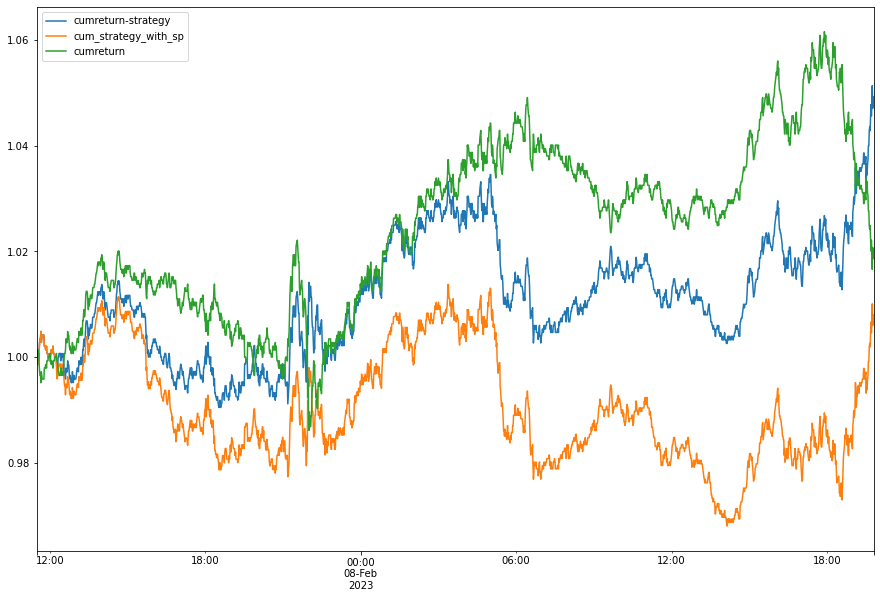

In [97]:
data.loc["2022-05-01":,["cumreturn-strategy","cum_strategy_with_sp","cumreturn"]].plot(figsize=(15,10))
plt.show()

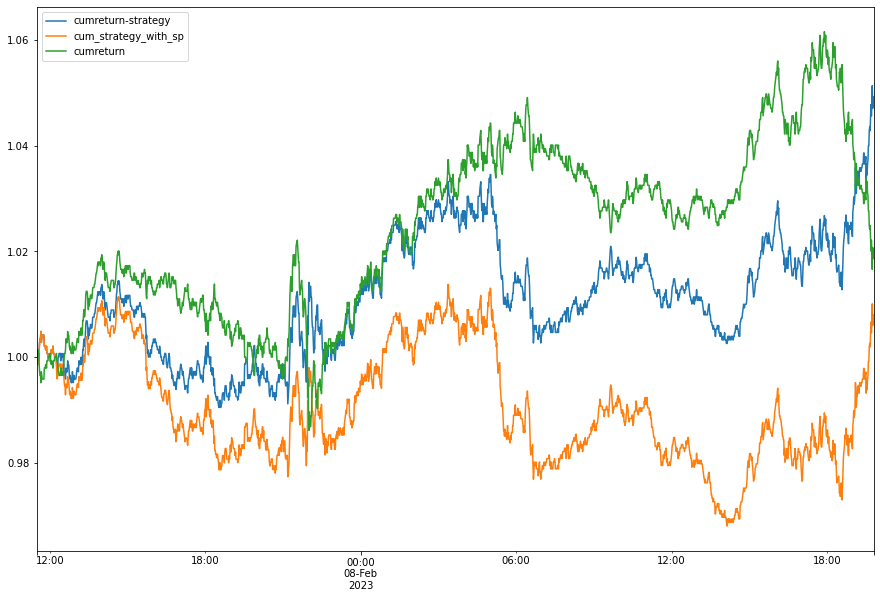

In [98]:
data.loc["2022-05-01":,["cumreturn-strategy","cum_strategy_with_sp","cumreturn"]].plot(figsize=(15,10))
plt.show()